In [1]:
# IPython magic
%config IPCompleter.greedy=True

# Import other notebooks
import import_ipynb
from DataPreprocessing import *
from Utils import *

# Imports
import pandas as pd
import numpy as np
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from scipy.interpolate import griddata

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
%matplotlib inline

# Pandas settings
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

importing Jupyter notebook from DataPreprocessing.ipynb
importing Jupyter notebook from DataLoader.ipynb
importing Jupyter notebook from Utils.ipynb


In [2]:
# Loading and cleaning bad data lines
dfInitial = loadDataset("dataset_initial", 17)
dfSecond = loadDataset("dataset_second", 6)
dfBoth = dfInitial.append(dfSecond, ignore_index=True)

# optimize data types and extract categorical data
df = dfBoth.copy()
df = assignDataTypes(df)
df = extractCategories(df)
df = remove_de_cache(df)

dataset_initial/dataset_00.json
dataset_initial/dataset_01.json
dataset_initial/dataset_02.json
dataset_initial/dataset_03.json
dataset_initial/dataset_04.json
dataset_initial/dataset_05.json
dataset_initial/dataset_06.json
dataset_initial/dataset_07.json
dataset_initial/dataset_08.json
dataset_initial/dataset_09.json
dataset_initial/dataset_10.json
dataset_initial/dataset_11.json
dataset_initial/dataset_12.json
dataset_initial/dataset_13.json
dataset_initial/dataset_14.json
dataset_initial/dataset_15.json
dataset_initial/dataset_16.json
dataset_initial/dataset_17.json
Rejected data:


,map,CT_score,T_score,is_overtime,round_status,round_status_time_left,CT_total_health,T_total_health,CT_num_alive_players,T_num_alive_players,CT_equip_value,T_equip_value,CT_money,T_money,CT_num_grenades,T_num_grenades,CT_num_he,T_num_he,CT_num_flash,T_num_flash,CT_num_smokes,T_num_smokes,CT_num_molly,T_num_molly,CT_has_Defuser,bomb_site,bomb_dropped,num_active_smokes,num_active_molotovs,round_winner,fileNumber,indexInFile
0,de_inferno,0,3,False,FreezeTime,20.000000,500,500,5,5,2000.0,18600,27300,33100,0,15,0,1,0,6,0,8,0,0,False,None,False,0,0,Terrorist,5,2543
1,de_train,5,0,False,FreezeTime,20.000000,500,600,5,6,5100.0,1200,40050,21550,0,0,0,0,0,0,0,0,0,0,True,None,False,0,0,CT,8,2251
2,de_vertigo,0,0,False,FreezeTime,20.000000,500,600,5,6,1000.0,1200,4000,4800,0,0,0,0,0,0,0,0,0,0,False,None,False,0,0,Terrorist,11,2162
3,de_train,0,0,False,FreezeTime,1.929688,500,500,5,5,1000.0,1000,80000,80000,0,0,0,0,0,0,0,0,0,0,False,None,True,0,0,Terrorist,12,3958


dataset_second/dataset_00.json
dataset_second/dataset_01.json
dataset_second/dataset_02.json
dataset_second/dataset_03.json
dataset_second/dataset_04.json
dataset_second/dataset_05.json
dataset_second/dataset_06.json
Rejected data:


,map,CT_score,T_score,is_overtime,round_status,round_status_time_left,CT_total_health,T_total_health,CT_num_alive_players,T_num_alive_players,CT_equip_value,T_equip_value,CT_money,T_money,CT_num_grenades,T_num_grenades,CT_num_he,T_num_he,CT_num_flash,T_num_flash,CT_num_smokes,T_num_smokes,CT_num_molly,T_num_molly,CT_has_Defuser,bomb_site,bomb_dropped,num_active_smokes,num_active_molotovs,round_winner,fileNumber,indexInFile
0,de_nuke,0,0,False,FreezeTime,1.937500,500,500,5,5,1000,1000,80000,80000,0,0,0,0,0,0,0,0,0,0,False,None,True,0,0,Terrorist,0,2398
1,de_vertigo,0,0,False,FreezeTime,1.921875,500,500,5,5,1000,1000,80000,80000,0,0,0,0,0,0,0,0,0,0,False,None,True,0,0,Terrorist,1,1512
2,de_nuke,0,0,False,FreezeTime,1.929688,500,500,5,5,1000,1000,80000,80000,0,0,0,0,0,0,0,0,0,0,False,None,True,0,0,Terrorist,1,4934
3,de_nuke,0,0,False,Normal,980.937500,500,500,5,5,1000,1000,80000,80000,0,0,0,0,0,0,0,0,0,0,False,None,True,0,0,Terrorist,1,4935


In [3]:
display(dfBoth)

,map,CT_score,T_score,is_overtime,round_status,round_status_time_left,CT_total_health,T_total_health,CT_num_alive_players,T_num_alive_players,CT_equip_value,T_equip_value,CT_money,T_money,CT_num_grenades,T_num_grenades,CT_num_he,T_num_he,CT_num_flash,T_num_flash,CT_num_smokes,T_num_smokes,CT_num_molly,T_num_molly,CT_has_Defuser,bomb_site,bomb_dropped,num_active_smokes,num_active_molotovs,round_winner,fileNumber,indexInFile
0,de_dust2,0,0,False,FreezeTime,20.000000,500,500,5,5,1000.0,1000,4000,4000,0,0,0,0,0,0,0,0,0,0,False,None,False,0,0,CT,0.0,0.0
1,de_dust2,0,0,False,FreezeTime,1.031250,500,500,5,5,4400.0,4350,600,650,2,6,0,0,2,4,0,2,0,0,True,None,False,0,0,CT,0.0,1.0
2,de_dust2,0,0,False,Normal,96.031250,391,400,4,4,3511.0,3300,750,500,2,5,0,0,2,3,0,2,0,0,True,None,False,0,0,CT,0.0,2.0
3,de_dust2,0,0,False,Normal,76.031250,391,400,4,4,3111.0,2100,750,500,0,0,0,0,0,0,0,0,0,0,True,None,False,2,0,CT,0.0,3.0
4,de_dust2,1,0,False,FreezeTime,19.968750,500,500,5,5,2648.0,1000,18350,10750,0,0,0,0,0,0,0,0,0,0,True,None,False,0,0,CT,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122397,de_train,11,14,False,BombPlanted,15.414062,200,242,2,4,7600.0,19350,100,5950,2,4,0,0,1,3,1,1,0,0,True,B,False,2,0,Terrorist,6.0,4730.0
122398,de_train,11,15,False,FreezeTime,19.929688,500,500,5,5,5950.0,11150,11500,23900,2,2,0,0,1,2,1,0,0,0,True,None,False,0,0,Terrorist,6.0,4731.0
122399,de_train,11,15,False,Normal,114.929690,500,500,5,5,15450.0,25150,1200,6700,15,20,2,0,5,10,5,5,3,5,True,None,False,0,0,Terrorist,6.0,4732.0
122400,de_train,11,15,False,Normal,94.929690,500,500,5,5,12750.0,26350,1200,6700,7,13,2,0,2,6,2,3,1,4,True,None,False,5,3,Terrorist,6.0,4733.0


In [4]:
display(df)

,map,CT_score,T_score,is_overtime,round_status,round_status_time_left,CT_total_health,T_total_health,CT_num_alive_players,T_num_alive_players,CT_equip_value,T_equip_value,CT_money,T_money,CT_num_grenades,T_num_grenades,CT_num_he,T_num_he,CT_num_flash,T_num_flash,CT_num_smokes,T_num_smokes,CT_num_molly,T_num_molly,CT_has_Defuser,bomb_site,bomb_dropped,num_active_smokes,num_active_molotovs,round_winner,fileNumber,indexInFile,round_winner_codes,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,status_FreezeTime,bomb_A,bomb_B
0,de_dust2,0,0,0,FreezeTime,20.000000,500,500,5,5,1000.0,1000,4000,4000,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,CT,0,0,0,1,0,0,0,0,0,1,0,0
1,de_dust2,0,0,0,FreezeTime,1.031250,500,500,5,5,4400.0,4350,600,650,2,6,0,0,2,4,0,2,0,0,1,NaN,0,0,0,CT,0,1,0,1,0,0,0,0,0,1,0,0
2,de_dust2,0,0,0,Normal,96.031250,391,400,4,4,3511.0,3300,750,500,2,5,0,0,2,3,0,2,0,0,1,NaN,0,0,0,CT,0,2,0,1,0,0,0,0,0,0,0,0
3,de_dust2,0,0,0,Normal,76.031250,391,400,4,4,3111.0,2100,750,500,0,0,0,0,0,0,0,0,0,0,1,NaN,0,2,0,CT,0,3,0,1,0,0,0,0,0,0,0,0
4,de_dust2,1,0,0,FreezeTime,19.968750,500,500,5,5,2648.0,1000,18350,10750,0,0,0,0,0,0,0,0,0,0,1,NaN,0,0,0,CT,0,4,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122397,de_train,11,14,0,BombPlanted,15.414062,200,242,2,4,7600.0,19350,100,5950,2,4,0,0,1,3,1,1,0,0,1,B,0,2,0,Terrorist,6,4730,1,0,0,0,0,0,1,0,0,1
122398,de_train,11,15,0,FreezeTime,19.929688,500,500,5,5,5950.0,11150,11500,23900,2,2,0,0,1,2,1,0,0,0,1,NaN,0,0,0,Terrorist,6,4731,1,0,0,0,0,0,1,1,0,0
122399,de_train,11,15,0,Normal,114.929690,500,500,5,5,15450.0,25150,1200,6700,15,20,2,0,5,10,5,5,3,5,1,NaN,0,0,0,Terrorist,6,4732,1,0,0,0,0,0,1,0,0,0
122400,de_train,11,15,0,Normal,94.929690,500,500,5,5,12750.0,26350,1200,6700,7,13,2,0,2,6,2,3,1,4,1,NaN,0,5,3,Terrorist,6,4733,1,0,0,0,0,0,1,0,0,0


In [5]:
df.describe()

,CT_score,T_score,is_overtime,round_status_time_left,CT_total_health,T_total_health,CT_num_alive_players,T_num_alive_players,CT_equip_value,T_equip_value,CT_money,T_money,CT_num_grenades,T_num_grenades,CT_num_he,T_num_he,CT_num_flash,T_num_flash,CT_num_smokes,T_num_smokes,CT_num_molly,T_num_molly,CT_has_Defuser,bomb_dropped,num_active_smokes,num_active_molotovs,fileNumber,indexInFile,round_winner_codes,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,status_FreezeTime,bomb_A,bomb_B
count,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000,122257.000000
mean,6.709006,6.782254,0.027606,55.194993,412.107192,402.731091,4.273653,4.266381,15216.806841,13909.707420,9781.027671,11243.716515,6.095414,6.475580,0.936683,0.449144,2.374907,2.799194,1.679855,1.782098,1.013185,1.382882,0.655995,0.164154,0.767073,0.180039,6.585463,2528.506744,0.510065,0.181127,0.194754,0.151942,0.155590,0.115175,0.110333,0.275477,0.058402,0.053437
std,4.790813,4.824656,0.163841,36.558999,132.308100,139.901094,1.205624,1.228172,10192.958485,9207.638478,11203.422897,12158.320412,6.036002,6.386599,1.290687,0.817418,2.240919,2.839885,1.729597,1.812069,1.465580,1.668210,0.475045,0.370417,1.197596,0.489787,4.875142,1472.282033,0.499901,0.385125,0.396013,0.358966,0.362468,0.319235,0.313306,0.446756,0.234502,0.224903
min,0.000000,0.000000,0.000000,0.007812,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,0.000000,19.960938,350.000000,322.000000,4.000000,4.000000,4800.000000,4350.000000,1300.000000,1600.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,0.000000,51.531250,500.000000,500.000000,5.000000,5.000000,15170.000000,14650.000000,5500.000000,7150.000000,4.000000,4.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.000000,2524.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,10.000000,0.000000,94.843750,500.000000,500.000000,5.000000,5.000000,24530.000000,22400.000000,14600.000000,18000.000000,10.000000,11.000000,2.000000,1.000000,4.000000,5.000000,3.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,11.000000,3803.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,32.000000,33.000000,1.000000,115.000000,500.000000,500.000000,5.000000,5.000000,39340.000000,36150.000000,80000.000000,80000.000000,20.000000,20.000000,5.000000,5.000000,10.000000,10.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,10.000000,7.000000,17.000000,5159.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.memory_usage(deep=True)

Index                     978056
map                       123039
CT_score                  122257
T_score                   122257
is_overtime               489028
round_status              122535
round_status_time_left    978056
CT_total_health           244514
T_total_health            244514
CT_num_alive_players      122257
T_num_alive_players       122257
CT_equip_value            978056
T_equip_value             244514
CT_money                  489028
T_money                   489028
CT_num_grenades           122257
T_num_grenades            122257
CT_num_he                 122257
T_num_he                  122257
CT_num_flash              122257
T_num_flash               122257
CT_num_smokes             122257
T_num_smokes              122257
CT_num_molly              122257
T_num_molly               122257
CT_has_Defuser            489028
bomb_site                 122453
bomb_dropped              489028
num_active_smokes         122257
num_active_molotovs       122257
round_winn

In [7]:
def display_category_pie(df, column, renameCol, title='Distribution', teamColors=True):
    printmd("## " + title)
    
    # Create table with percentage distribution
    distrib = pd.DataFrame(df[column].value_counts()).rename(columns={column: renameCol})
    
    # Team colors
    colorList = []
    if teamColors:
        colorDict = {
            'CT': 'tab:blue',
            'Terrorist': 'tab:orange'
        }
        for cat in distrib.index:
            colorList.append(colorDict[cat])
    
    # Create figure
    fig, ax = plt.subplots()
    if teamColors: 
        ax.pie(distrib.T.values[0], labels=distrib.index, colors=colorList, autopct='%1.2f%%')
    else:
        ax.pie(distrib.T.values[0], labels=distrib.index, autopct='%1.2f%%')
    ax.axis('equal')

    # Show count table and pie plot
    display(distrib)
    plt.show()

## Round Win Distribution

,# of Round Wins
Terrorist,62359
CT,59898


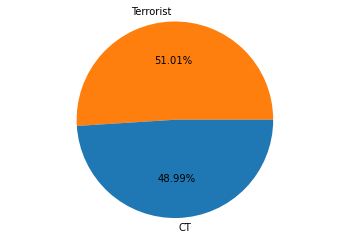

In [8]:
# Check for balance of classes
display_category_pie(df, 'round_winner', '# of Round Wins', 'Round Win Distribution')

## Map Distribution

,# of Screenshots
de_inferno,23810
de_dust2,22144
de_nuke,19022
de_mirage,18576
de_overpass,14081
de_train,13489
de_vertigo,11135


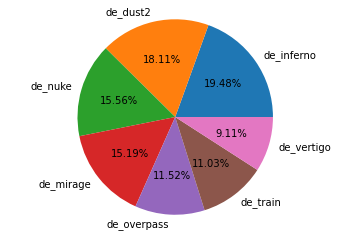

In [9]:
# Map choice percentages
display_category_pie(df, 'map', '# of Screenshots', 'Map Distribution', teamColors=False)

## Round Wins per Map

## de_dust2 - Round Distribution

,# of Round Wins
Terrorist,11987
CT,10157


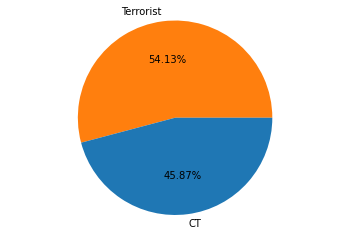

## de_inferno - Round Distribution

,# of Round Wins
Terrorist,13000
CT,10810


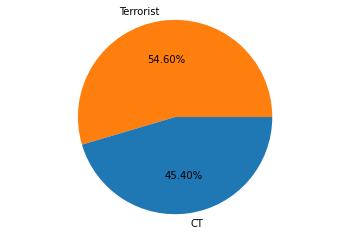

## de_mirage - Round Distribution

,# of Round Wins
Terrorist,9434
CT,9142


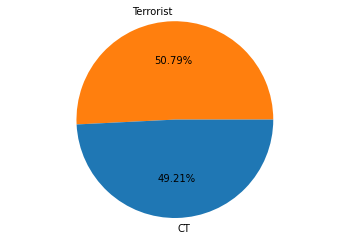

## de_nuke - Round Distribution

,# of Round Wins
CT,10206
Terrorist,8816


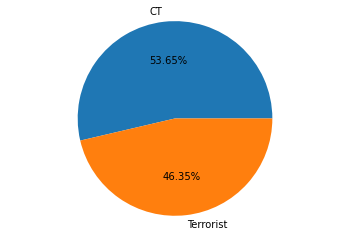

## de_overpass - Round Distribution

,# of Round Wins
Terrorist,7042
CT,7039


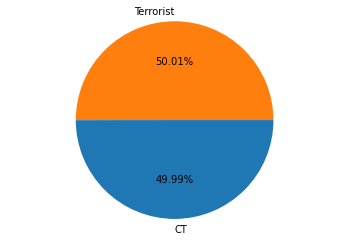

## de_train - Round Distribution

,# of Round Wins
CT,7301
Terrorist,6188


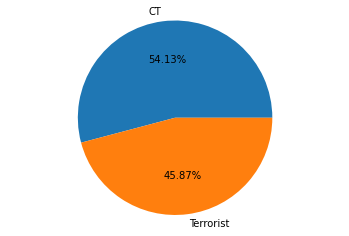

## de_vertigo - Round Distribution

,# of Round Wins
Terrorist,5892
CT,5243


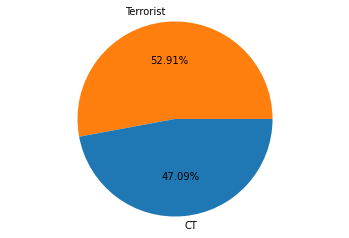

In [10]:
def roundWinsPerMap(df):
    printmd("## Round Wins per Map")
    
    mapList = df["map"].cat.categories
    for elem in mapList:
        display_category_pie(df[(df["map"] == elem)], 'round_winner', '# of Round Wins', elem + ' - Round Distribution')
        
roundWinsPerMap(df)

## Round Wins per Map after the bomb is planted

## de_dust2 - Round Distribution

,# of Round Wins
Terrorist,2037
CT,633


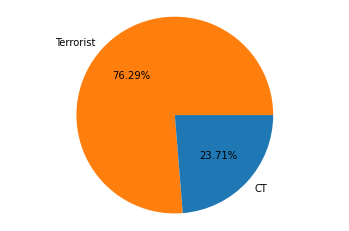

## de_inferno - Round Distribution

,# of Round Wins
Terrorist,2493
CT,589


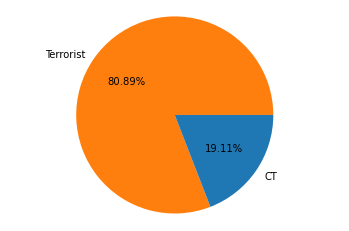

## de_mirage - Round Distribution

,# of Round Wins
Terrorist,1646
CT,447


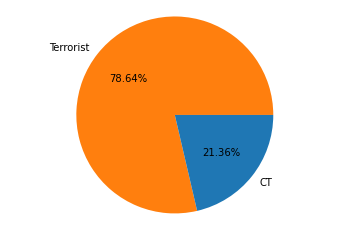

## de_nuke - Round Distribution

,# of Round Wins
Terrorist,1385
CT,467


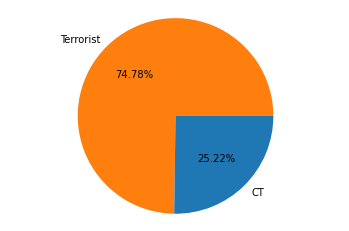

## de_overpass - Round Distribution

,# of Round Wins
Terrorist,1057
CT,282


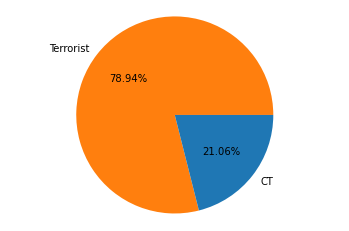

## de_train - Round Distribution

,# of Round Wins
Terrorist,1033
CT,381


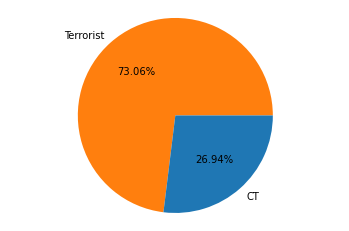

## de_vertigo - Round Distribution

,# of Round Wins
Terrorist,924
CT,299


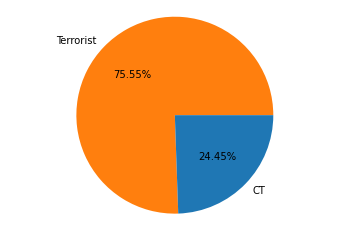

In [11]:
def roundBombWinsPerMap(df):
    printmd("## Round Wins per Map after the bomb is planted")
    
    mapList = df["map"].cat.categories
    for elem in mapList:
        display_category_pie(df[((df["map"] == elem) & (df["round_status"] == "BombPlanted"))], 'round_winner', '# of Round Wins', elem + ' - Round Distribution')
        
roundBombWinsPerMap(df)

## Equipment Value Difference influence on outcomes

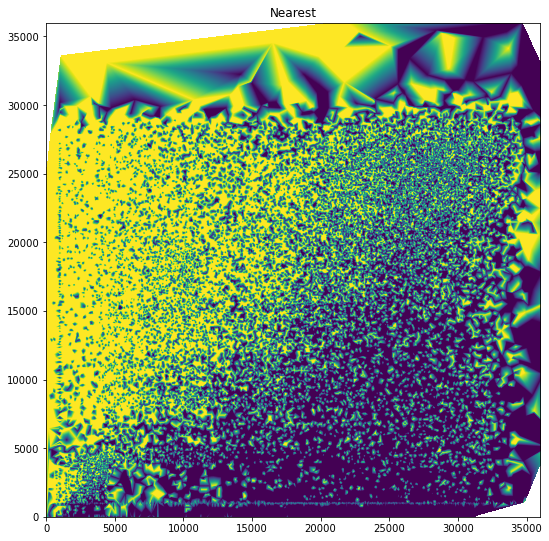

In [12]:
def equip_value_win_distrib(df):
    printmd("## Equipment Value Difference influence on outcomes")
    
#     dfEquipV = df[['CT_equip_value', 'T_equip_value', 'round_winner_codes']]
    dfEquipV = df.loc[:,('CT_equip_value', 'T_equip_value', 'round_winner_codes')]
    dfEquipV['equip_dV'] = dfEquipV['CT_equip_value'] - dfEquipV['T_equip_value']
    dfTest = dfEquipV[['equip_dV', 'round_winner_codes']]
#     scatter_matrix(dfTest, alpha=0.2, figsize=(6, 6), diagonal='kde')
#     sns.heatmap(dfTest, annot=True)
#     df.set_index([CT_equip_value, T_equip_value]).round_winner_codes.unstack(0).pipe(plt.imshow)

#     pivoted = dfEquipV.pivot('T_equip_value','CT_equip_value','round_winner_codes')
#     display(pivoted)

#     fig = plt.figure()
#     ax = fig.add_subplot(projection='3d')
    
#     for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
#         xs = dfEquipV['CT_equip_value']
#         ys = dfEquipV['T_equip_value']
#         zs = dfEquipV['round_winner_codes']
#         ax.scatter(xs, ys, zs, marker=m)
        
#     plt.show()
    
    grid_x, grid_y = np.mgrid[0:36000:3600j, 0:36000:3600j]
    points = dfEquipV[['CT_equip_value', 'T_equip_value']].to_numpy(copy=True)
    values = dfEquipV['round_winner_codes'].to_numpy(copy=True)
    griddataTest = griddata(points, values, (grid_x, grid_y), method='linear')
    plt.subplot(222)
    plt.imshow(griddataTest.T, extent=(0,36000,0,36000), origin='lower')
    plt.title('Nearest')
    plt.gcf().set_size_inches(20, 20)
    plt.show()
    
equip_value_win_distrib(df)

In [17]:
def testMulticollinearity(df):
    printmd("## Multicolinearity Test")
    
    # calculate VIF (https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/)
    X = df.drop(['round_winner', 'fileNumber', 'indexInFile', 'map', 'round_status', 'bomb_site', 'CT_num_grenades', 'T_num_grenades'], axis=1)
    X = X.astype('float64')
    X2 = add_constant(X)
    display(pd.Series([variance_inflation_factor(X2.values, i) 
               for i in range(X2.shape[1])], 
              index=X2.columns))

testMulticollinearity(df)

## Multicolinearity Test

const                     59.939300
CT_score                   2.005934
T_score                    1.990943
is_overtime                1.412438
round_status_time_left     6.619144
CT_total_health           23.630204
T_total_health            17.737537
CT_num_alive_players      20.087200
T_num_alive_players       14.024869
CT_equip_value             7.590549
T_equip_value              6.158047
CT_money                   1.714705
T_money                    1.741290
CT_num_he                  2.716921
T_num_he                   1.571387
CT_num_flash               3.978324
T_num_flash                4.858668
CT_num_smokes              4.597655
T_num_smokes               4.984179
CT_num_molly               3.848101
T_num_molly                4.529875
CT_has_Defuser             1.756559
bomb_dropped               1.133858
num_active_smokes          1.589518
num_active_molotovs        1.195977
round_winner_codes         1.341795
map_de_dust2               2.528148
map_de_inferno             2

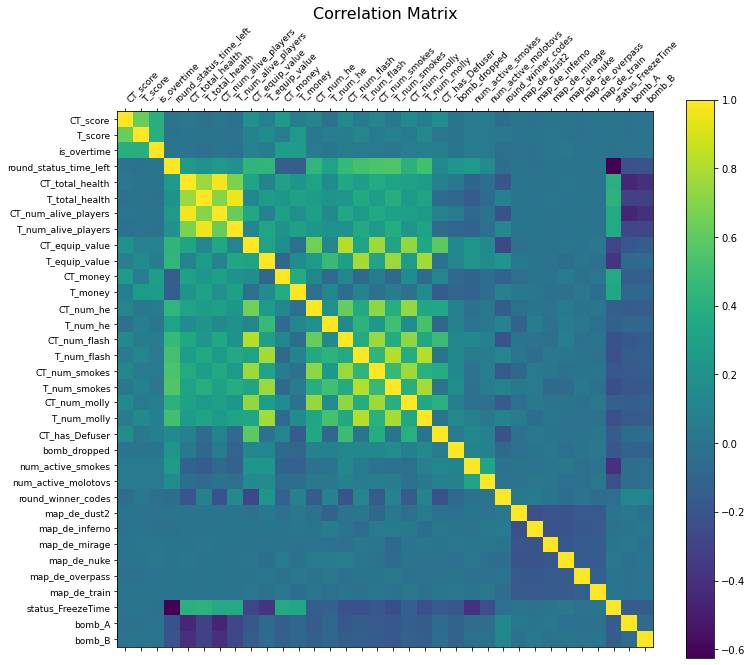

In [18]:
def displayCorrelationMatrix(df):
    X = df.drop(['round_winner', 'fileNumber', 'indexInFile', 'map', 'round_status', 'bomb_site', 'CT_num_grenades', 'T_num_grenades'], axis=1)
    X = X.astype('float64')
#     corr = df.corr()
#     corr.style.background_gradient(cmap='coolwarm').set_precision(3)
#     display(corr)

    f = plt.figure(figsize=(12, 10))
    plt.matshow(X.corr(), fignum=f.number)
    plt.xticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=9, rotation=45, ha="left")
    plt.yticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=9)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=10)
    plt.title('Correlation Matrix', fontsize=16);

displayCorrelationMatrix(df)

<AxesSubplot:>

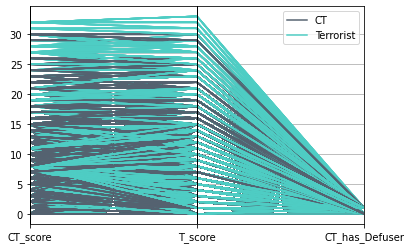

In [53]:
dfTest = df[['CT_score', 'T_score', 'CT_has_Defuser', 'round_winner']]

parallel_coordinates(dfTest, 'round_winner', color=('#556270', '#4ECDC4'))